## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import cv2 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

## Data Loading

In [3]:
train_data_dir = 'dataset/train/'
test_data_dir = 'dataset/test/'

In [4]:
class_labels = os.listdir(train_data_dir)
print(class_labels)

['bad', 'dysgraphia', 'good']


## Listing Input Directory

In [5]:
for wdir in os.listdir('dataset'):
    print(wdir)
    wdir_total = 0
    for label in class_labels:
        total = len(os.listdir(os.path.join('dataset', wdir, label)))
        print(label, total)
        wdir_total +=total
    print(wdir,'-----',wdir_total)

test
bad 316
dysgraphia 327
good 323
test ----- 966
train
bad 736
dysgraphia 762
good 754
train ----- 2252


In [6]:
class_labels=["Bad","Dysgraphic","Good"]

***pie-chart using Train and Test Data***

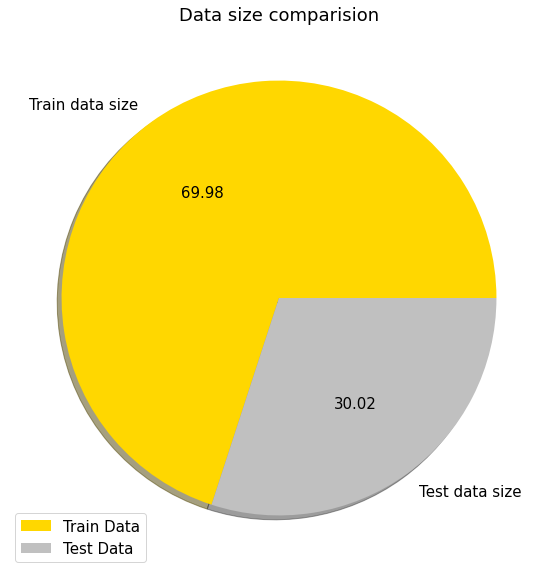

In [7]:
plt.figure(figsize=(10,10))
plt.rcParams.update({"font.size":15})
plt.grid()
plt.pie(x=[2252,966],labels=["Train data size","Test data size"],colors=["gold","silver"],autopct="%.2f",shadow=True)
plt.title(label="Data size comparision")
plt.legend(["Train Data","Test Data"])
plt.show()

In [8]:
num_classes = 3
img_rows= 256
img_cols= 256
channel = 3

# Resize the image 

In [9]:
def load_training_data():
    # Load validation images
    labels = os.listdir(train_data_dir)
    

    X_train = np.ndarray((1278, img_rows, img_cols, 3), dtype=np.uint8)
    Y_train = np.zeros((1278,), dtype='uint8')

    i = 0
    print('-'*30)
    print('Creating Training images...')
    print('-'*30)
    j = 0
    for label in labels:
        image_names_train = os.listdir(os.path.join(train_data_dir, label))
        if len(image_names_train)>296:
            image_names_train=image_names_train[:296]
        else:
            image_names_train=image_names_train
        total = len(image_names_train)
        print(label, total)
        for image_name in image_names_train:
            try:
                img = cv2.imread(os.path.join(train_data_dir, label, image_name), 1)

                img = np.array(cv2.resize(img, (img_rows,img_cols)))

                X_train[i] = img
                if len(Y_train)<1480:
                    Y_train[i] = j
            except Exception as e:
                pass
            i += 1
        j += 1
    print(i)            
    print('Loading done.')
    
    print('Transform targets to keras compatible format.')
    Y_train = to_categorical(Y_train, num_classes)

    
    return X_train, Y_train

In [10]:
def load_validation_data():
    # Load validation images
    labels = os.listdir(test_data_dir)
    

    X_test = np.ndarray((320, img_rows, img_cols, 3), dtype=np.uint8)
    Y_test = np.zeros((320,), dtype='uint8')

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    j = 0
    for label in labels:
        image_names_test = os.listdir(os.path.join(test_data_dir, label))
        if len(image_names_test)>74:
            image_names_test=image_names_test[:74]
        else:
            pass
        total = len(image_names_test)
        print(label, total)
        for image_name in image_names_test:
            try:
                img = cv2.imread(os.path.join(test_data_dir, label, image_name), 1)

                img = np.array(cv2.resize(img, (img_rows,img_cols)))

                X_test[i] = img
                if len(Y_test)<370:
                    Y_test[i] = j
            except Exception as e:
                pass
            i += 1
        j += 1
    print(i)            
    print('Loading done.')
    
    print('Transform targets to keras compatible format.')
    Y_test = to_categorical(Y_test, num_classes)

    
    return X_test, Y_test

In [11]:
x_train, y_train = load_training_data()

------------------------------
Creating Training images...
------------------------------
bad 296
dysgraphia 296
good 296
888
Loading done.
Transform targets to keras compatible format.


In [12]:
x_test, y_test = load_validation_data()

------------------------------
Creating validation images...
------------------------------
bad 74
dysgraphia 74
good 74
222
Loading done.
Transform targets to keras compatible format.


In [13]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1278, 256, 256, 3) (1278, 3) (320, 256, 256, 3) (320, 3)


## Data Visualization

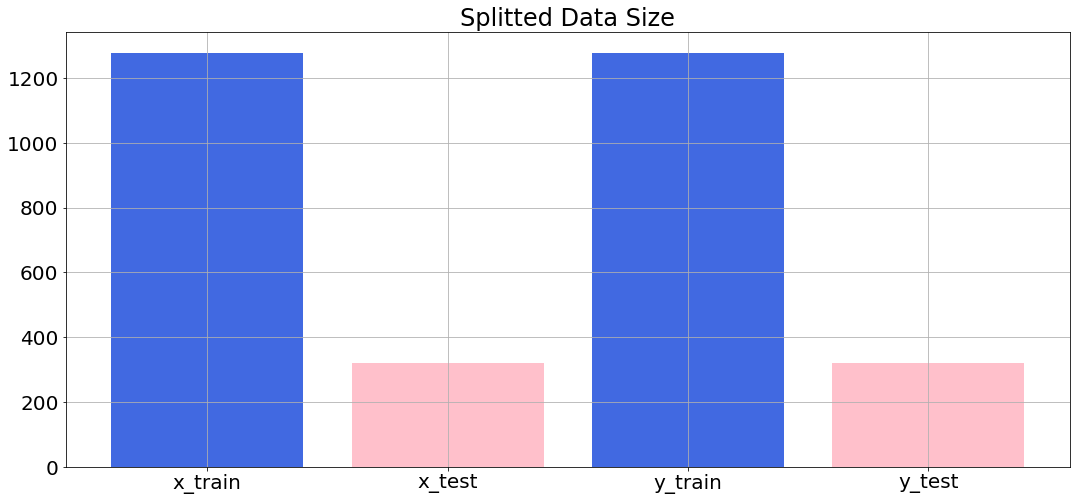

In [14]:
plt.figure(figsize=(18,8))
plt.rcParams.update({"font.size":20})
plt.grid()
plt.bar(x=["x_train","x_test","y_train","y_test"],height=[x_train.shape[0], x_test.shape[0],y_train.shape[0], y_test.shape[0]],color=["royalblue","pink","royalblue","pink"])
plt.title(label="Splitted Data Size")
plt.show()

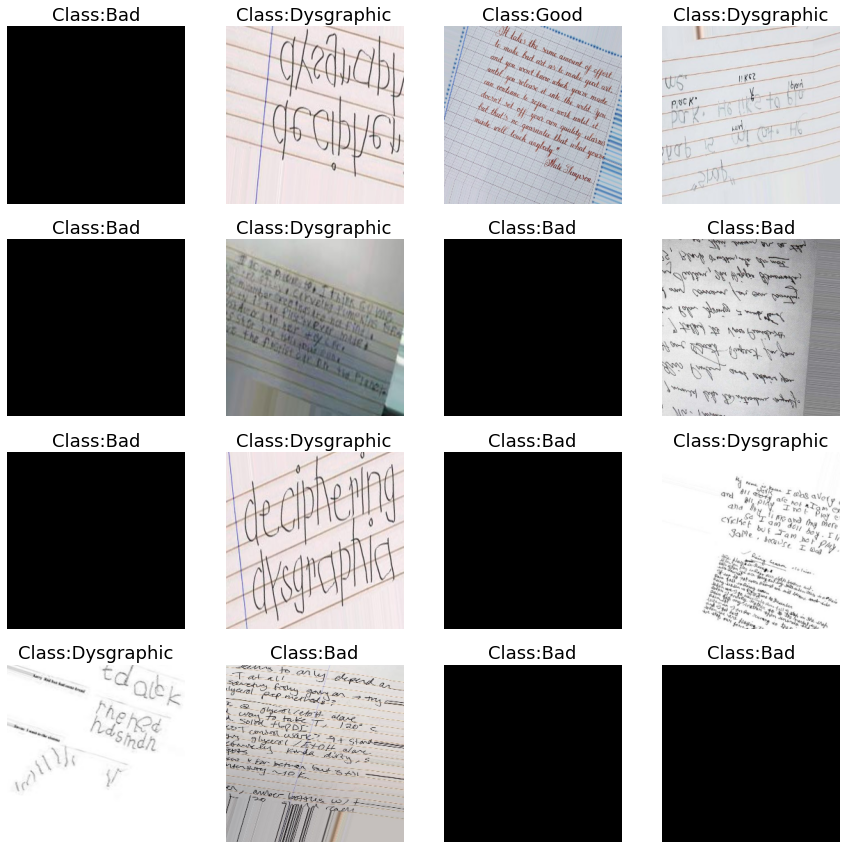

In [17]:
def show_images(X,y):
    
    # get image lables
    labels=["Bad","Dysgraphic","Good"]
    lab=[]
    for i in range(len(y)):
        lab.append(np.argmax(y[i]))
    
    # get a lot of images
    x,y = X,lab
    
    # show a grid of 16 images
    plt.figure(figsize=(15, 15))
    plt.rcParams.update({"font.size":15})
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, 1278)
        clr_img=cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB)
        plt.imshow(clr_img)
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
# Display Train Images
show_images(x_train,y_train)

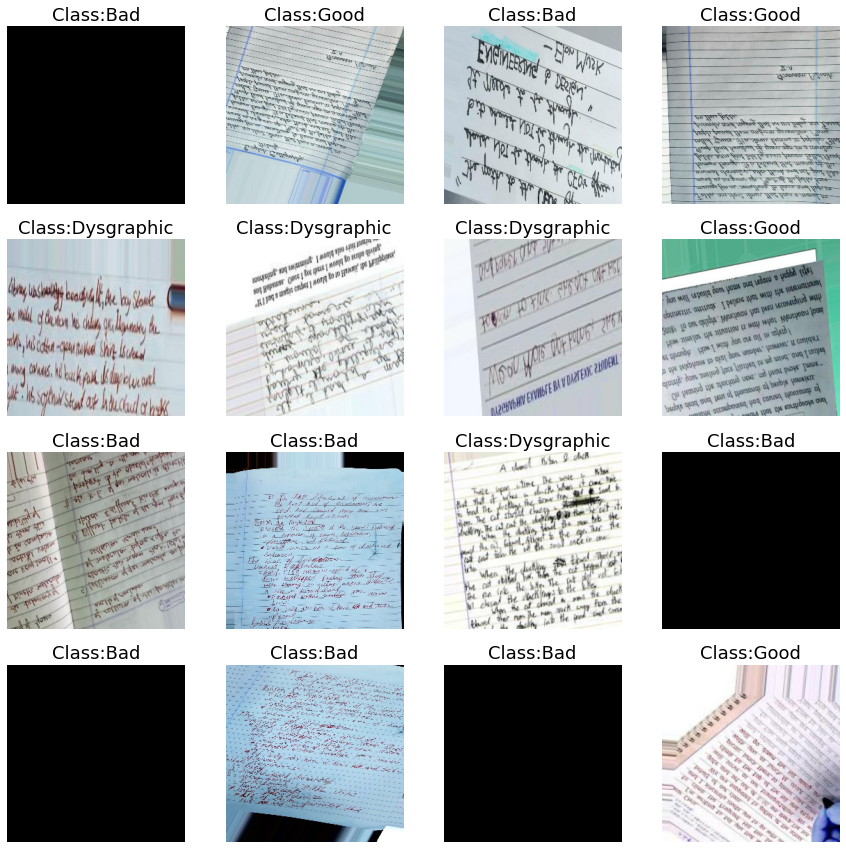

In [18]:
def show_images(X,y):
    
    # get image lables
    labels=["Bad","Dysgraphic","Good"]
    lab=[]
    for i in range(len(y)):
        lab.append(np.argmax(y[i]))
    
    # get a lot of images
    x,y = X,lab
    
    # show a grid of 16 images
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, 320)
        clr_img=cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB)
        plt.imshow(clr_img)
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
# Display Train Images
show_images(x_test,y_test)

In [19]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

# Build Model

In [20]:
import tensorflow as tf

In [21]:
resnet_model=tf.keras.applications.ResNet152V2(include_top=False,
                                                   weights="imagenet",
                                                   input_tensor=None,
                                                   input_shape=(256,256,3),
                                                   pooling="max",
                                                   classes=1000)
resnet_model.trainable = False

In [22]:
inputs = resnet_model.input

m = tf.keras.layers.Dense(1024, activation='relu')(resnet_model.output)

outputs = tf.keras.layers.Dense(3, activation='softmax')(m)

resnet_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

# Train the model

In [25]:
history=resnet_model.fit(x=x_train,y=y_train,batch_size=64,epochs=20)

Epoch 1/20
20/20 [==============================] - 126s 6s/step - loss: 3.8907 - accuracy: 0.7011
Epoch 2/20
20/20 [==============================] - 122s 6s/step - loss: 0.3766 - accuracy: 0.8912
Epoch 3/20
20/20 [==============================] - 122s 6s/step - loss: 0.1045 - accuracy: 0.9648
Epoch 4/20
20/20 [==============================] - 122s 6s/step - loss: 0.0395 - accuracy: 0.9898
Epoch 5/20
20/20 [==============================] - 122s 6s/step - loss: 0.0199 - accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 124s 6s/step - loss: 0.0123 - accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 123s 6s/step - loss: 0.0083 - accuracy: 1.0000
Epoch 8/20
20/20 [==============================] - 122s 6s/step - loss: 0.0062 - accuracy: 1.0000
Epoch 9/20
20/20 [==============================] - 122s 6s/step - loss: 0.0049 - accuracy: 1.0000
Epoch 10/20
20/20 [==============================] - 122s 6s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 11/

## Accuracy and Loss plot-graphs

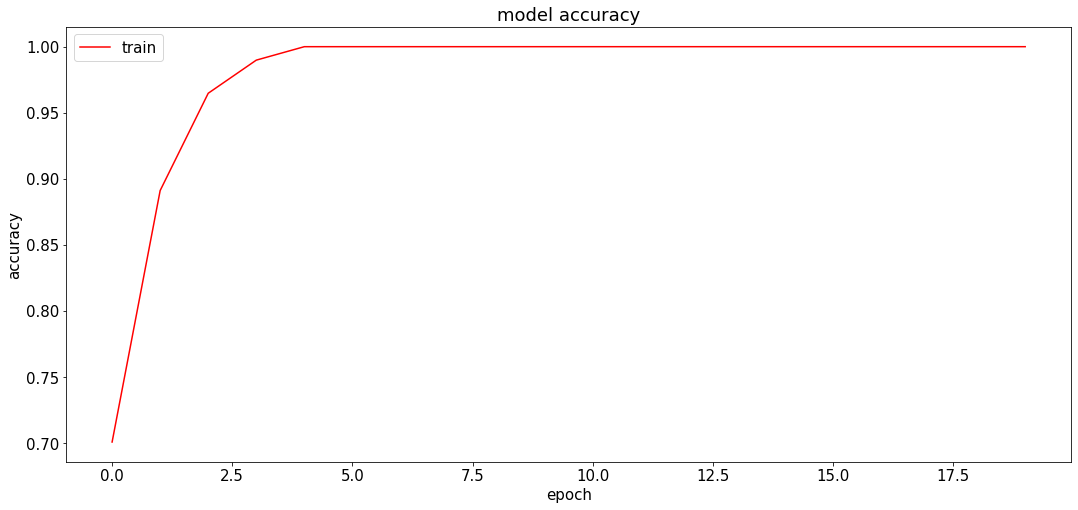

In [26]:
# summarize history for accuracy
plt.figure(figsize=(18,8))
plt.plot(history.history['accuracy'],color='r')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

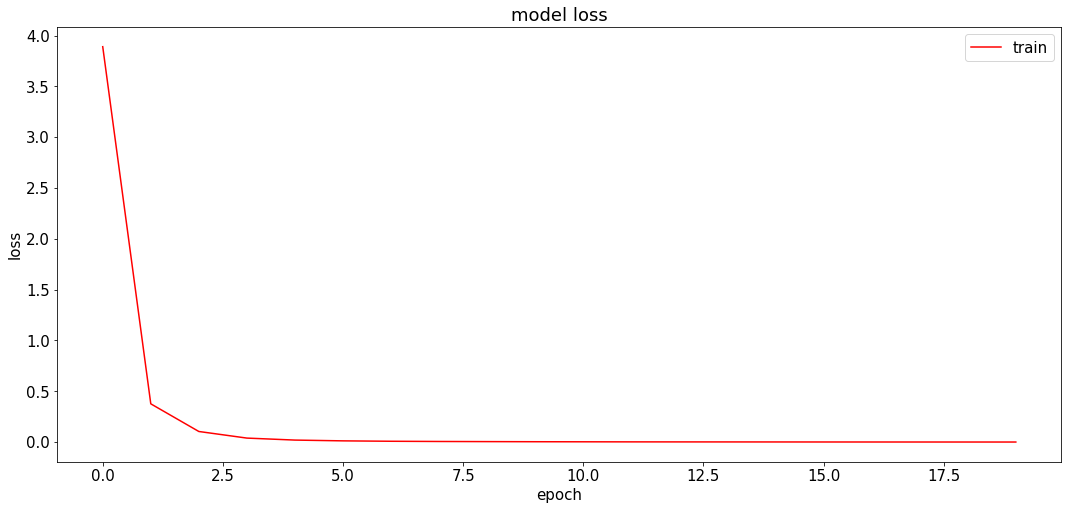

In [27]:
# summarize history for loss
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'],color='r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## Model Prediction

In [28]:
y_pred = resnet_model.predict(x_test, batch_size=64, verbose=1)

5/5 [==============================] - 32s 6s/step


In [29]:
print(y_pred)

[[1.23310519e-06 9.99997258e-01 1.52107361e-06]
 [5.88040275e-05 9.99941230e-01 3.70239945e-08]
 [1.81407468e-05 9.99981761e-01 8.46719033e-08]
 [1.75537238e-08 1.00000000e+00 1.90855373e-10]
 [1.09192513e-06 9.99998450e-01 4.67012569e-07]
 [4.72823856e-03 9.95252252e-01 1.95159664e-05]
 [3.52334767e-03 9.96462762e-01 1.38907335e-05]
 [1.68167242e-06 9.99998331e-01 8.62470007e-09]
 [1.37941261e-05 9.99985933e-01 2.17447294e-07]
 [1.43123816e-06 9.99998569e-01 3.72113256e-08]
 [6.03754913e-08 9.99999881e-01 3.10724557e-09]
 [1.06363681e-04 1.39999088e-06 9.99892235e-01]
 [5.31672093e-08 1.31754189e-06 9.99998689e-01]
 [8.26166928e-01 3.60507262e-03 1.70227975e-01]
 [2.66721457e-01 1.88220234e-03 7.31396377e-01]
 [3.92967671e-01 1.83525262e-05 6.07014000e-01]
 [1.10164852e-04 4.11026129e-08 9.99889731e-01]
 [5.18835623e-06 3.70971591e-08 9.99994755e-01]
 [9.60032105e-01 1.13976776e-05 3.99563871e-02]
 [2.07299181e-05 8.42187617e-08 9.99979138e-01]
 [1.85189828e-01 5.97406615e-05 8.147503

In [30]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

320

In [31]:
print(y_predict)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

320

In [33]:
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Result Analysis

### Classification Report

In [34]:
print(classification_report(y_true=y_true,y_pred=y_predict,target_names=class_labels))

              precision    recall  f1-score   support

         Bad       0.86      0.69      0.77       172
  Dysgraphic       0.63      0.84      0.72        74
        Good       0.51      0.58      0.54        74

    accuracy                           0.70       320
   macro avg       0.67      0.70      0.68       320
weighted avg       0.73      0.70      0.71       320



### Confusion Matrix

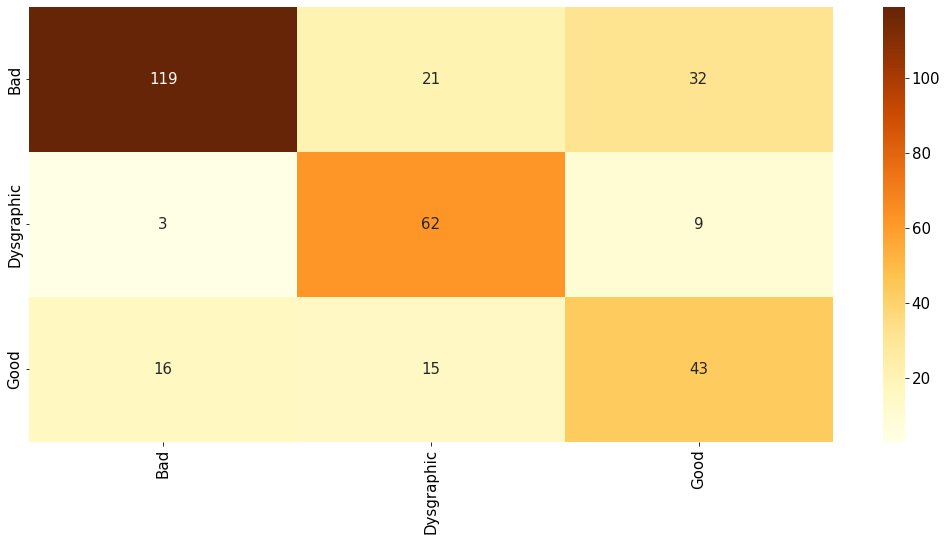

In [35]:
plt.figure(figsize=(18,8))
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=y_predict),
            annot=True,
            fmt=".4g",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cmap="YlOrBr")
plt.xticks(rotation=90)
plt.show()

## Model Saving

In [36]:
resnet_model.save("model/Resnet152V2_model.h5")

In [3]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('model/Resnet152V2_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 256, 256, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('yes/222.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (256, 256)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[1.0372268e-05 2.2975908e-06 9.9998736e-01]]


In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('model/Resnet152V2_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'model_unquant.tflite' , 'wb' ) 
file.write( tflmodel )

INFO:tensorflow:Assets written to: C:\Users\ABHISH~1\AppData\Local\Temp\tmpdsc_4h9l\assets


c:\users\abhishekkacher\appdata\local\programs\python\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


241194696

In [ ]:
tflite_convert --graph_def_file=optimized_graph.pb \
  --output_file=output/optimized_graph_quantized.tflite \
  --output_format=TFLITE \
  --input_shape=1,299,299,3 \
  --input_array=Mul \
  --output_array=final_result \
  --inference_type=QUANTIZED_UINT8 \
  --std_dev_values=128 --mean_values=128 \
  --default_ranges_min=-6 --default_ranges_max=6 \
  --quantize_weights=true